# Comparing Multinomial Naive Bayes with Linear SVC

## Importing Packages

In [1]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Reading CSV

In [2]:
df = pd.read_csv('tweets_01-08-2021.csv')

## Data Pre-Processing

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

## Train-Test Split

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['year'],
                                                    test_size=0.2,
                                                    stratify=df['year'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  45256
Size of Test Data  11315


## Defining Methods for Further Processing

### Method to create a new **CountVectorizer**

In [9]:
def getCountVectorizer(min_df, ngram_range, stop_words):
  return CountVectorizer(min_df=min_df, ngram_range=ngram_range, stop_words=stop_words)

### Method for applying a model

In [6]:
def apply_model(model, X, Y, X_test, Y_test):
  model.fit(X,Y)
  Y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test, Y_pred)
  print ('Accuracy Score - ', accuracy)
  return accuracy

## Iterating over Parameters to find the best model

This section iterates over possible values of:

1. min-df: [1, 3]
2. ngram_range: [(1,1), (1,3)]

It stores the results, to find the best model later on.


Initializing CountVectorizer with min-df: 1 and ngram_range: (1, 1).

Applying Multinomial Naive Bayes Model:
Accuracy Score -  0.5647370746796289
Confusion Matrix for Multinomial NB:
 [[   0    0    0    0    3    4    4    0    0    0    0    0    0]
 [   0    1    2    1   14    2    6    0    0    0    1    1    0]
 [   0    0   11   64   27    5   15    0    0    3   10   20    0]
 [   0    0    0  283  201   35   66    5    1    8   36   71    0]
 [   0    0    0   41 1036  175  149    2    4   10   67  145    0]
 [   0    0    0   12  268  482  273    4    0    6   46   66    0]
 [   0    0    0    5  139  123  974   62    2    6   72  124    0]
 [   0    0    0    4   20    4  149  388    4   18   77  181    0]
 [   0    0    0    0    6    2    9   11   38   63  143  249    0]
 [   0    0    0    1    4    4   12    6    6  170  265  246    0]
 [   0    0    0    1   11    4   20   11    1   40  895  581    0]
 [   0    0    0    1   10    2   20   10    2   11  279 2112    0

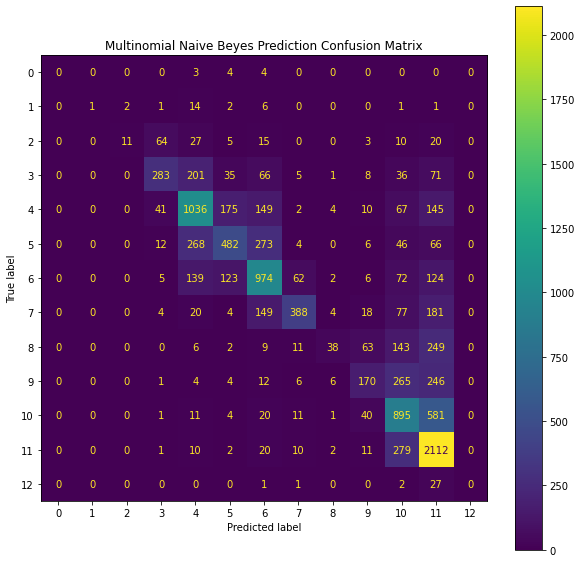


Applying Linear SVC Model:
Accuracy Score -  0.6028281042863456
Confusion Matrix for Linear SVC:
 [[   8    1    0    0    2    0    0    0    0    0    0    0    0]
 [   0    8    6    3    3    3    2    1    1    0    0    1    0]
 [   0    1   83   38   13    6    4    3    1    2    2    2    0]
 [   0    1   37  402  144   38   41   11    9    5    7   10    1]
 [   1    0    8  107 1062  204  138   24   13   13   24   34    1]
 [   1    0    4   42  260  589  190   24    9    8   14   16    0]
 [   0    1    7   34  143  191  903  116   17    9   31   54    1]
 [   0    1    2   19   30   17  132  483   33   21   28   79    0]
 [   0    0    2    7   23    9   18   39  196   68   65   94    0]
 [   1    1    0   11   23    6   16   26   60  317  121  131    1]
 [   0    1    1   13   24   17   23   34   43  117  845  445    1]
 [   0    1    3   12   35    8   15   36   48   74  291 1921    3]
 [   0    0    0    0    0    1    1    1    1    0    2   21    4]]



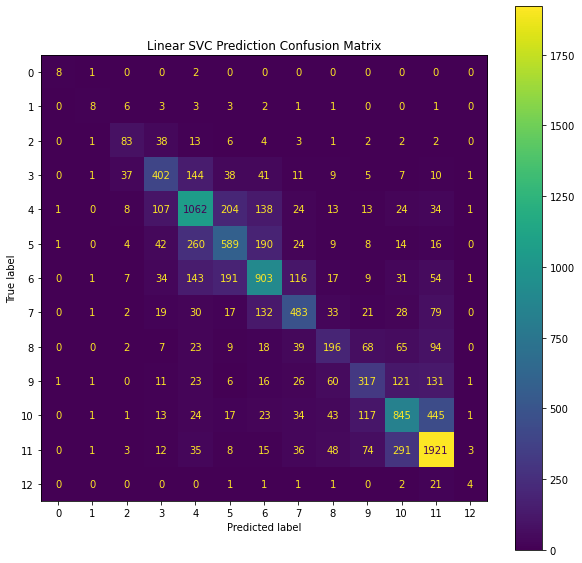


Initializing CountVectorizer with min-df: 1 and ngram_range: (1, 3).

Applying Multinomial Naive Bayes Model:
Accuracy Score -  0.5660627485638533
Confusion Matrix for Multinomial NB:
 [[   2    0    0    0    3    2    4    0    0    0    0    0    0]
 [   0    1    1    3   12    1    6    0    0    0    1    3    0]
 [   0    0   22   50   17    4   16    0    0    1   10   35    0]
 [   0    0    1  236  192   30   57    0    0    2   44  144    0]
 [   0    0    0   18 1003  149  152    1    2    3   68  233    0]
 [   0    0    0    9  243  458  285    2    0    1   33  126    0]
 [   0    0    0    0  110  117  985   38    2    3   68  184    0]
 [   0    0    0    1   13    4  153  315    1    9   76  273    0]
 [   0    0    0    0    5    1   12    5   39   32  142  285    0]
 [   0    0    0    0    1    1    5    4    1  187  249  266    0]
 [   0    0    0    0    6    3    9    2    0    9  899  636    0]
 [   0    0    0    0    3    0   15    5    0    1  165 2258    0

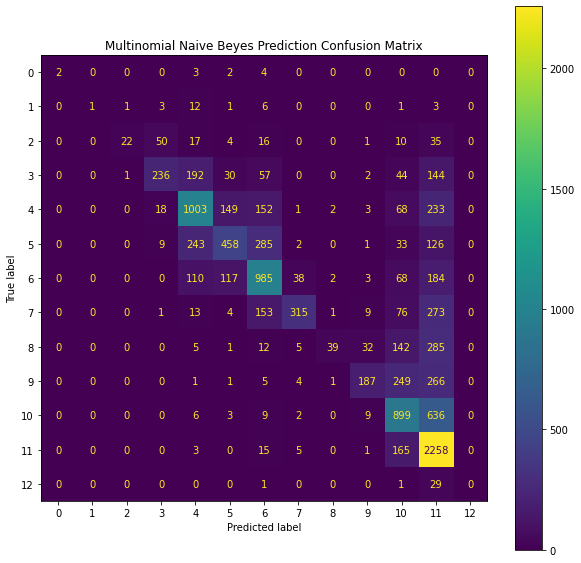


Applying Linear SVC Model:
Accuracy Score -  0.6286345558992488
Confusion Matrix for Linear SVC:
 [[   8    1    0    0    1    0    1    0    0    0    0    0    0]
 [   0    8    7    4    3    0    3    1    0    1    0    1    0]
 [   0    0   73   46   22    4    5    0    1    0    0    4    0]
 [   0    1   18  387  192   36   40    4    1    4    7   16    0]
 [   0    0    1   70 1169  196  148    6    4    5   11   19    0]
 [   0    0    2   33  299  545  241    7    1    5    8   15    1]
 [   0    0    1   20  170  169  958   89   10   12   23   54    1]
 [   0    0    0   14   52   16  132  489   14    9   16  103    0]
 [   0    0    0    7   35    3   12   41  194   48   65  116    0]
 [   0    0    0    9   20    5   15   28   54  327  122  134    0]
 [   0    0    0   10   38   10   20   34   42   87  862  461    0]
 [   0    0    1    4   43    6   19   30   32   29  192 2090    1]
 [   0    0    0    0    1    0    1    1    0    0    1   24    3]]



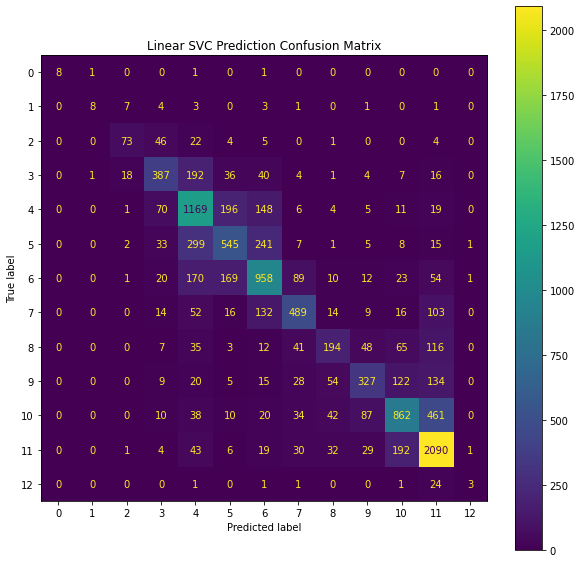


Initializing CountVectorizer with min-df: 3 and ngram_range: (1, 1).

Applying Multinomial Naive Bayes Model:
Accuracy Score -  0.5832081307998233
Confusion Matrix for Multinomial NB:
 [[   1    0    0    0    2    5    3    0    0    0    0    0    0]
 [   0    3    3    1   13    5    3    0    0    0    0    0    0]
 [   0    0   48   65   20    4    7    1    0    3    3    4    0]
 [   0    0    8  354  167   44   62   10    7   11   12   31    0]
 [   0    0    1   86  996  231  151    9   13   21   34   87    0]
 [   0    0    1   27  262  549  243   11    4   16   21   23    0]
 [   0    0    2   25  140  189  921  118    7   17   32   56    0]
 [   0    0    0    8   21   12  143  493   14   33   34   87    0]
 [   0    0    0    3   11    3   11   35  150   88   98  122    0]
 [   0    0    0    1    7    8   14   27   48  327  141  141    0]
 [   0    0    2    7   19    9   28   44   30  134  840  451    0]
 [   0    0    0    4   20    4   35   72   26   57  312 1917    0

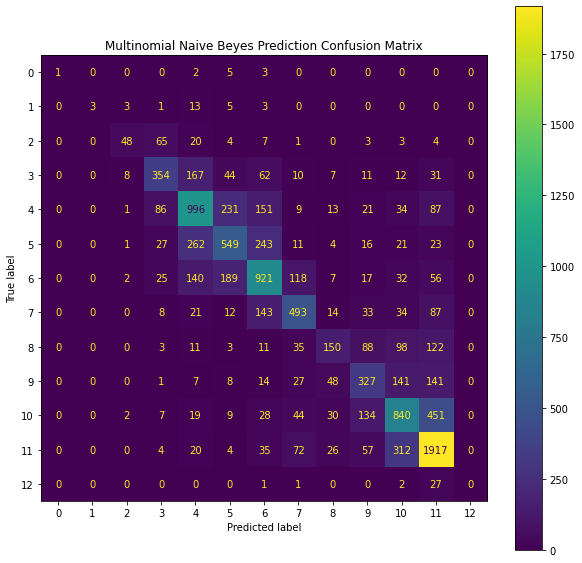


Applying Linear SVC Model:
Accuracy Score -  0.5841802916482546
Confusion Matrix for Linear SVC:
 [[   7    2    0    0    2    0    0    0    0    0    0    0    0]
 [   1    6    6    3    2    3    3    1    2    0    0    1    0]
 [   0    1   79   37   15    8    4    1    2    1    2    4    1]
 [   0    3   37  381  149   47   43   10   10    5   11   10    0]
 [   2    1    9   96 1030  225  155   30   14   12   21   33    1]
 [   0    1    4   41  270  545  220   25    9   10   12   20    0]
 [   0    1    6   34  166  187  883  130   18   11   27   44    0]
 [   2    0    1   18   35   21  132  471   26   23   32   83    1]
 [   0    0    3   10   26    9   18   40  189   69   70   87    0]
 [   0    1    2   10   23   10   16   25   65  303  123  135    1]
 [   0    1    4   13   29   16   24   39   49  112  826  449    2]
 [   0    1    2   15   31   10   26   44   50   74  304 1886    4]
 [   0    0    0    0    0    1    0    0    1    0    2   23    4]]



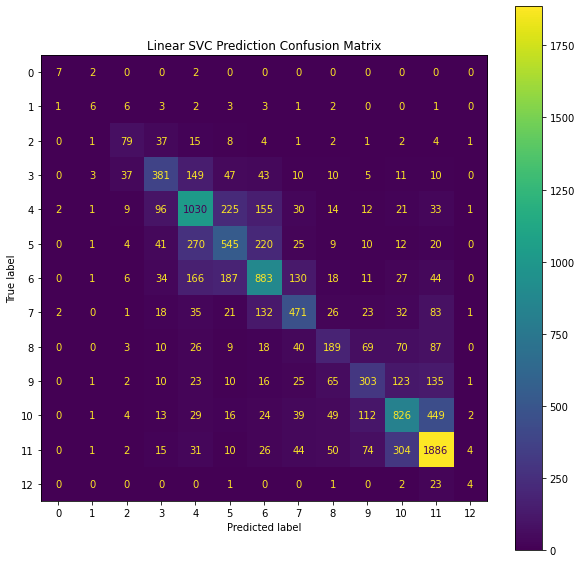


Initializing CountVectorizer with min-df: 3 and ngram_range: (1, 3).

Applying Multinomial Naive Bayes Model:
Accuracy Score -  0.6011489173663279
Confusion Matrix for Multinomial NB:
 [[   5    0    0    0    3    1    2    0    0    0    0    0    0]
 [   0    2    3    4   13    2    2    0    0    0    1    1    0]
 [   0    0   41   62   24    4   10    0    0    3    3    8    0]
 [   0    0    3  343  179   43   58    8    5   11   17   39    0]
 [   0    0    1   70 1036  203  150    3    6   18   47   95    0]
 [   0    0    1   19  280  555  237    9    1   12   17   26    0]
 [   0    0    0   15  162  174  950  101    4   13   35   53    0]
 [   0    0    0    7   25   12  135  492   11   30   43   90    0]
 [   0    0    0    2   11    2   14   37  142   98  101  114    0]
 [   0    0    0    1    7    5   17   18   34  340  169  123    0]
 [   0    0    0    2   19    6   26   33   20  115  914  429    0]
 [   0    0    0    3   16    2   42   47   16   40  299 1982    0

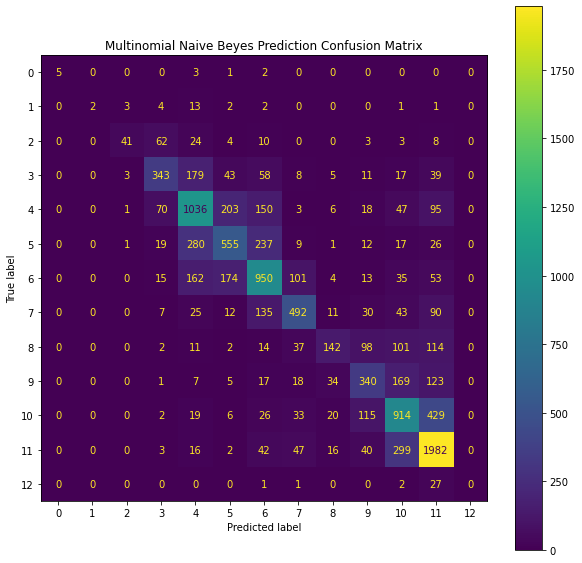


Applying Linear SVC Model:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy Score -  0.5939019001325674
Confusion Matrix for Linear SVC:
 [[   7    2    0    0    2    0    0    0    0    0    0    0    0]
 [   0    5    6    4    3    2    3    0    1    1    2    1    0]
 [   0    0   77   38   18    6    7    3    1    1    1    3    0]
 [   0    0   34  378  147   60   41   10    6    7   14    8    1]
 [   1    1    6  101 1042  228  166   16   12    8   18   28    2]
 [   0    0    6   32  260  567  239   20    5    7   11   10    0]
 [   1    0    4   21  189  206  874  115    9   16   25   45    2]
 [   1    0    2   21   32   20  135  485   22   20   22   84    1]
 [   0    0    2   10   17   11   16   40  208   75   70   72    0]
 [   1    0    2   11   21   18   18   22   57  333  121  107    3]
 [   0    0    5   11   27   15   28   46   47  106  865  413    1]
 [   1    0    0   15   26   15   34   47   57   82  290 1876    4]
 [   0    0    0    0    0    0    3    0    0    0    3   22    3]]



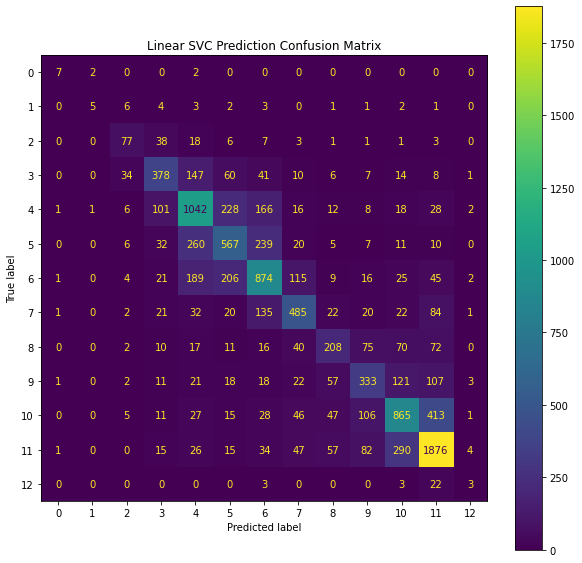

In [24]:
results = {'Model': [], 'Model-Name': [], 'Min-df': [], 'Ngram_range': [], 'Accuracy':[]}
for min_df in [1,3]:
  for ngram_range in [(1,1),(1,3)]:
    print("="*100)
    print(f"\nInitializing CountVectorizer with min-df: {min_df} and ngram_range: {ngram_range}.")
    countv = getCountVectorizer(min_df, ngram_range, stop_words="english")    
    X_train_tf = countv.fit_transform(X_train)
    X_test_tf = countv.transform(X_test)
    
    #MultinomialNB
    print("\nApplying Multinomial Naive Bayes Model:")
    modelNB = MultinomialNB()
    accuracy = apply_model(modelNB, X_train_tf, Y_train, X_test_tf, Y_test)

    Y_pred = modelNB.predict(X_test_tf)
    cm = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix for Multinomial NB:\n",cm)
    print()
        
    cmp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title("Multinomial Naive Beyes Prediction Confusion Matrix")
    cmp.plot(ax=ax)
    plt.show()

    results['Model'].append(modelNB)
    results['Model-Name'].append("Multinomial Naive Bayes")
    results['Min-df'].append(min_df)
    results['Ngram_range'].append(ngram_range)
    results['Accuracy'].append(accuracy)

    #Linear SVC
    print("\nApplying Linear SVC Model:")
    modelSVC = svm.LinearSVC()
    accuracy = apply_model(modelSVC, X_train_tf, Y_train, X_test_tf, Y_test)

    Y_pred = modelSVC.predict(X_test_tf)
    cm = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix for Linear SVC:\n",cm)
    print()

    cmp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.title("Linear SVC Prediction Confusion Matrix")    
    cmp.plot(ax=ax)
    plt.show()

    results['Model'].append(modelSVC)
    results['Model-Name'].append("Linear SVC")
    results['Min-df'].append(min_df)
    results['Ngram_range'].append(ngram_range)
    results['Accuracy'].append(accuracy)


## Conclusion

In [25]:
print("According to Accuracy, the models fair as follows:")
results_df = pd.DataFrame(results)
results_df.sort_values('Accuracy',ascending=False)

According to Accuracy, the models fair as follows:


,Model,Model-Name,Min-df,Ngram_range,Accuracy
3,LinearSVC(),Linear SVC,1,"(1, 3)",0.628635
1,LinearSVC(),Linear SVC,1,"(1, 1)",0.602828
6,MultinomialNB(),Multinomial Naive Bayes,3,"(1, 3)",0.601149
7,LinearSVC(),Linear SVC,3,"(1, 3)",0.593902
5,LinearSVC(),Linear SVC,3,"(1, 1)",0.584180
4,MultinomialNB(),Multinomial Naive Bayes,3,"(1, 1)",0.583208
2,MultinomialNB(),Multinomial Naive Bayes,1,"(1, 3)",0.566063
0,MultinomialNB(),Multinomial Naive Bayes,1,"(1, 1)",0.564737
